# 데이터 전처리

## 1. Scaling
### 왜 해야 할까요?
* 변수의 크기가 너무 작거나, 너무 큰 경우 해당 변수가 Target 에 미치는 영향력이 제대로 표현되지 않을 수 있다.    
  - Min-Max Scaling : Min-Max 스케일링을 하면, 값의 범위가 0 ~ 1 사이로 변경된다. 최솟값과 최댓값을 맞춰 데이터 간 비교를 좀 수월하게 할 수 있음.
  - Standard Scaling
## 2. Sampling
## 3. Dimensionality Redution(차원 축소)
## 4. Categorical Variable to Numeric variable

In [29]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

import os
from os.path import join
import warnings
warnings.filterwarnings('ignore')       # 가벼운 경고들은 무시하게 설정.

러신머닝의 대표적 데이터셋 중 하나인 전복 데이터 불러오기.
전복 데이터셋은 수컷, 암컷 유아기 3개의 범주로 이루어진 범주형 변수와 길이, 직경, 높이, 무게 등 여러 수치형 변수로 이루어져 있다.
데이터를 불러온 후 입력으로 사용할 변수들과 레이블로 사용할 성별 변수로 나눈다.

In [50]:
abalone_path = join('.', 'abalone.txt')
columns_path = join('.', 'abalone_attributes.txt')

abalone_columns = list()
for l in open(columns_path):
  abalone_columns.append(l.strip())
# print(abalone_columns)

# Pandas를 이용해 abalone 데이터 불러오기
# csv 파일을 불러올때만 names= 를 사용
data = pd.read_csv(abalone_path, header=None, names=abalone_columns)
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [51]:
# head(), shape 함수를 이용해 데이터를 살펴봐야한다.
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [52]:
data.shape

(4177, 9)

In [53]:
label = data['Sex']
del data['Sex']
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


In [35]:
# Scaling
data2 = (data - np.min(data)) / (np.max(data) - np.min(data))
data2

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286
...,...,...,...,...,...,...,...,...
4172,0.662162,0.663866,0.146018,0.313441,0.248151,0.314022,0.246637,0.357143
4173,0.695946,0.647059,0.119469,0.341420,0.294553,0.281764,0.258097,0.321429
4174,0.709459,0.705882,0.181416,0.415796,0.352724,0.377880,0.305431,0.285714
4175,0.743243,0.722689,0.132743,0.386931,0.356422,0.342989,0.293473,0.321429


In [39]:
# 데이터 전처리 모듈을 불러오고 정의하기
from sklearn.preprocessing import MinMaxScaler

mMscaler = MinMaxScaler()
mMscaler.fit(data)                                # 데이터 입히기
data3 = mMscaler.transform(data)          # 데이터 변환(Numpy array 형태로)
data3

array([[0.51351351, 0.5210084 , 0.0840708 , ..., 0.1323239 , 0.14798206,
        0.5       ],
       [0.37162162, 0.35294118, 0.07964602, ..., 0.06319947, 0.06826109,
        0.21428571],
       [0.61486486, 0.61344538, 0.11946903, ..., 0.18564845, 0.2077728 ,
        0.28571429],
       ...,
       [0.70945946, 0.70588235, 0.18141593, ..., 0.37788018, 0.30543099,
        0.28571429],
       [0.74324324, 0.72268908, 0.13274336, ..., 0.34298881, 0.29347285,
        0.32142857],
       [0.85810811, 0.84033613, 0.17256637, ..., 0.49506254, 0.49177877,
        0.39285714]])

In [41]:
# 바로 위 코드를 간략화
mMscaler = MinMaxScaler()
data4 = mMscaler.fit_transform(data)

In [43]:
type(data4)

numpy.ndarray

In [46]:
mMscaled_data = pd.DataFrame(data4, columns=data.columns)
mMscaled_data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286


## - Standard Scaling
* z-score라고 하는 데이터를 통계적으로 표준정규분포화 시켜 스케일링하는 방식.
* 데이터의 평균이 0, 표준 편차가 1이 되도록 스케일링.
  - 중심이 되는 데이터(평균 데이터)를 0, 최저 데이터 -1, 최고 데이터를 1로 하고 데이터의 분산도를 파악할수 있다.

- sklearn에서 preprocessing 패키지에 있음.

In [48]:
# Standard Scaling 해보기
from sklearn.preprocessing import StandardScaler

sdscaler = StandardScaler()
sdscaled_data = sdscaler.fit_transform(data)

sdscaled_data = pd.DataFrame(sdscaled_data, columns=data.columns)
sdscaled_data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013


## 2. Sampling
* 왜 함?
  - 클래스 불균형 문제는 분류를 목적으로하는 데이터셋에 클래스 라벨의 비율이 균형을 맞추지 않고, 한쪽으로 치우친 경우를 말함.
  - 이럴 경우 모델이 각 클래스의 데이터를 제대로 학습하기 어려워지기 때문에 각 클래스 간 균형을 맞추는 작업이 필요하다.

* 1) Oversampling : 적은 클래스의 데이터 개수를 증가
* 2) Undersampling : 많은 클래스의 데이터 개수를 감소

### 1) Random Over, Under Sampling




In [49]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler()
rus = RandomUnderSampler()

In [58]:
# Oversampling
oversampled_data, oversampled_label = ros.fit_resample(data, label)
oversampled_data = pd.DataFrame(oversampled_data, columns=data.columns)

In [59]:
# Undersampling
undersampled_data, undersampled_label = rus.fit_resample(data, label)
undersampled_data = pd.DataFrame(undersampled_data, columns=data.columns)
print('원본 데이터의 클래스 비율 \n{0}'.format(pd.get_dummies(label).sum()))
print('\n 랜덤 오버샘플링의 결과 \n{0}'.format(pd.get_dummies(oversampled_label).sum()))  # 라벨데이터를 쏟아낸다?
print('\n 랜덤 언더샘플링의 결과 \n{0}'.format(pd.get_dummies(undersampled_label).sum()))

원본 데이터의 클래스 비율 
F    1307
I    1342
M    1528
dtype: int64

 랜덤 오버샘플링의 결과 
F    1528
I    1528
M    1528
dtype: int64

 랜덤 언더샘플링의 결과 
F    1307
I    1307
M    1307
dtype: int64


In [60]:
# SMOTE
from imblearn.over_sampling import SMOTE

In [64]:
# 샘플 데이터 만들어내기
from sklearn.datasets import make_classification
data, label = make_classification(n_samples=1000, n_features=2,
                                  n_informative=2, n_redundant=0,
                                  n_repeated=0, n_classes=3, n_clusters_per_class=1,
                                  weights=[0.05, 0.15, 0.8], class_sep=0.8, random_state=2019)

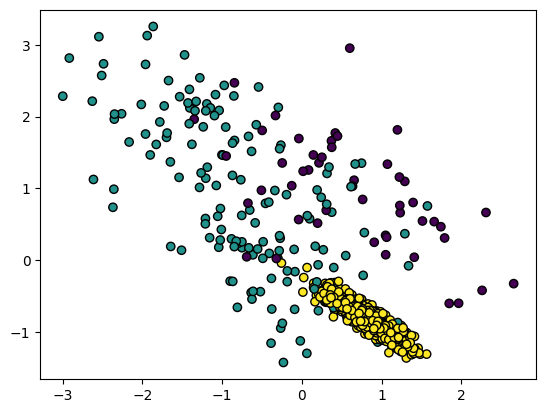

In [69]:
fig = plt.Figure(figsize=(12, 6))
plt.scatter(data[:, 0], data[:, 1], c=label, linewidths=1, edgecolor= 'k')

In [ ]:
SMOTE 못들음

## 3. 차원 축소(Dimensionality Redution)

* 차원의 저주 : 저차원에서 일어나지 않는 현상들이 고차원에서 데이터를 분석하거나 다룰 때 생겨나는 현상을 말한다.
- 데이터 차원이 너무 큰 경우 필요없는 변수를 제거하고, 과적합을 방지하기 위해 데이터의 차원을 축소한다.
- 또는, 사람이 인식할 수 있는 차원이 3차원이 최대이므로 데이터의 시각화를 위해서 차원을 축소하기도 한다.

※ 데이터의 밀도를 높여서 학습의 효율을 높이는 것

### 1) 주 성분 분석(Principal Component Analysis, PCA)


In [70]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)     # 데이터셋의 정보

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [72]:
data = digits.data
label = digits.target

print(data[0])
print(label[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
0


In [80]:
# 데이터 형태 reshape()을 사용하여 바꾸기
data[0].reshape((8, -1))  # reshape(8, 8)을 좀 더 쉽게 표현한 것, -1을 주면 계수를 알아서 정한다

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Label : 0


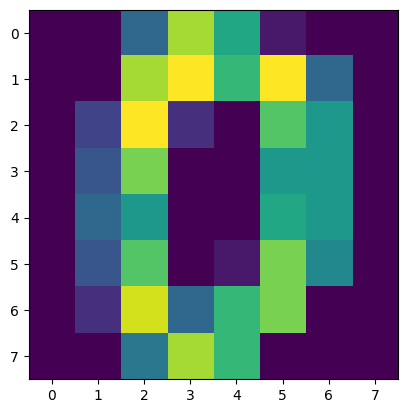

In [81]:
plt.imshow(data[0].reshape((8,8)))
print('Label : {}'.format(label[0]))

In [90]:
# 차원 축소
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

# 데이터에서 주성분 찾는 방법
new_data = pca.fit_transform(data)

In [91]:
# 결과는????????
print('원본 데이터의 차원 \n{}'.format(data.shape))
print('PCA 데이터의 차원 \n{}'.format(new_data.shape))

원본 데이터의 차원 
(1797, 64)
PCA 데이터의 차원 
(1797, 2)


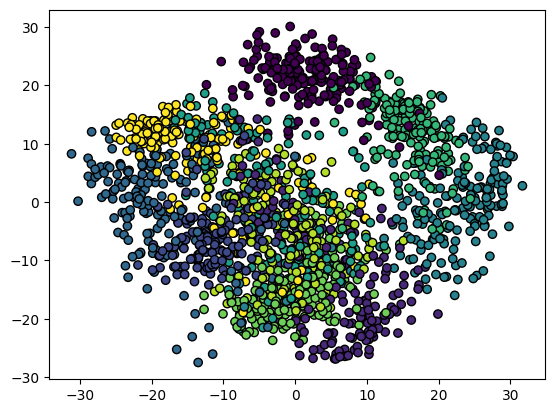

In [92]:
plt.scatter(new_data[:, 0], new_data[:, 1], c=label, linewidths=1, edgecolor='black')

## Label Encoding

* n개의 범주형 데이터를 0-n-1 의 연속적 수치 데이터로 표현.

In [93]:
data = pd.read_csv(abalone_path, header=None, names=abalone_columns)
label = data['Sex']
del data

In [96]:
from sklearn.preprocessing import LabelEncoder
labelEncode = LabelEncoder()

encoded_label = labelEncode.fit_transform(label)
encoded_label

array([2, 2, 0, ..., 2, 0, 2])

## One-hot Encoding
* n개의 범주형 데이터를 n개의 비트(0,1) 벡터로 표현


In [112]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [115]:
# label.values.reshape((-1, 1))   # 1개씩 넣어서 만들어줘
ohe.fit(label.values.reshape((-1,1)))
one_hot_encoded = ohe.transform(label.values.reshape((-1, 1)))

columns = np.concatenate([np.array(['label']), ohe.categories_[0]])
print(columns)
result = pd.DataFrame(data = np.concatenate(
    [label.values.reshape((-1, 1)), one_hot_encoded.reshape((-1, 3))], axis=1), columns=columns
)
result.head

['label' 'F' 'I' 'M']


,label,F,I,M
0,M,0.0,0.0,1.0
1,M,0.0,0.0,1.0
2,F,1.0,0.0,0.0
3,M,0.0,0.0,1.0
4,I,0.0,1.0,0.0
5,I,0.0,1.0,0.0
6,F,1.0,0.0,0.0
7,F,1.0,0.0,0.0
8,M,0.0,0.0,1.0
9,F,1.0,0.0,0.0
